In [4]:
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option("display.max_columns", None)
pd.option_context('display.max_rows', None, 'display.max_columns', None)
import dash
import dash
from dash import dcc
from dash import html
import plotly.express as px
from plotly import figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib as plt
import seaborn as sns
import csv
import os
import pathlib as path
import plotly #https://plotly.com/python/getting-started/ /////// pip install plotly
import numpy as np
import scipy
from scipy import stats


In [5]:

toplaner_agg = path.Path(r'F:\LeagueStats\scraping\LeagueDataAnalysis\workingTables\TopLaneStats_agg_50games_majorLeague.csv')
toplaner_agg_winloss =  path.Path(r'F:\LeagueStats\scraping\LeagueDataAnalysis\workingTables\TopLaneStats_agg_Win-Loss_majorLeague.csv')
df_ta = pd.read_csv(toplaner_agg)
df_wl = pd.read_csv(toplaner_agg_winloss)

In [6]:
dft = df_wl[['player', 'games','result', 'avg(earnedgoldshare)']]
tat = df_ta[['player','winPercentage']]
dft2 = dft.merge(tat, on='player')

def func(result, winPercentage):
    if result == 0:
        return 100-winPercentage
    else:
        return winPercentage



dft2['winPercentage'] = dft2.apply(lambda x: func(x['result'], x['winPercentage']), axis=1)
dft2.reset_index(drop=True, inplace=True)




In [7]:
mymean = np.mean(dft2['avg(earnedgoldshare)'])
mystd = np.std(dft2['avg(earnedgoldshare)'])
mypd = scipy.stats.norm.pdf((dft2['avg(earnedgoldshare)']), mymean, mystd)
mult = [-3,-2,-1,0,1,2,3]
distribution = np.linspace(mymean - 3*mystd, mymean + 3*mystd, 185)
stdvals = [((i*mystd)+mymean).round(3) for i in mult]
print(stdvals)
#px.scatter(df_ta['avg(earnedgoldshare)'], x=x_axis, y=df_ta['avg(earnedgoldshare)'], hover_data=[df_ta['player']])
#px.hist(df_ta['avg(earnedgoldshare)'], x, stats.norm.pdf(x, mymean, mystd), hover_data=[df_ta['player']])
#fig = px.histogram(dft2['avg(earnedgoldshare)'], x=distribution, nbins = 15, labels={'x':'EarnedGoldShare', 'y':'count'}, pattern_shape=dft2['result'])

winners = dft2.loc[dft2['result']==1]['avg(earnedgoldshare)']

losers = dft2.loc[dft2['result']==0]['avg(earnedgoldshare)']

text = list(dft2.player)

hist_data = [winners.round(4), losers.round(4)]
group_labels = ['Won', 'Lost']
colors = ['blue', 'orange']

counts, bins = np.histogram(winners)
fig = ff.create_distplot(hist_data, 
                        group_labels, 
                        bin_size = 0.0009, 
                        colors = colors,
                        curve_type='normal',
                        
                        )


fig.update_layout(bargap=0.02,
                title_text = 'Avg Earned Gold Share By Result')
#fig.update_xaxes(dtick=stdvals)

fig.show()


[0.188, 0.199, 0.21, 0.221, 0.232, 0.243, 0.254]


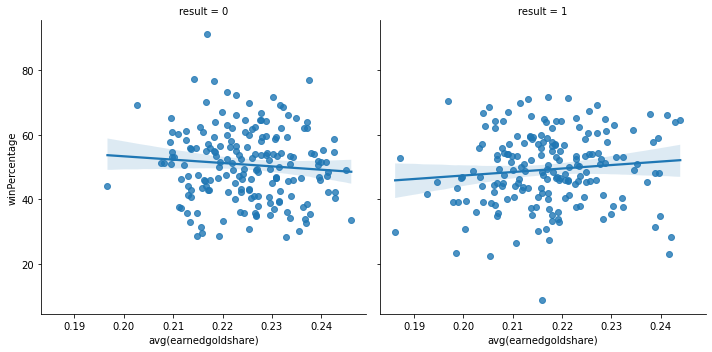

In [29]:
pc = ['orange' if i == 'Solo' else 'blue' for i in dft2['player']]
sns.lmplot(x='avg(earnedgoldshare)',
         y='winPercentage',
         col = 'result',
         data = dft2, palette = pc)



In [9]:
dft2.loc[dft2['player']=='Solo']

,player,games,result,avg(earnedgoldshare),winPercentage
290,Solo,64,0,0.231103,53.3333
291,Solo,56,1,0.219515,46.6667


In [10]:
toplaneFile = path.Path(r'F:\LeagueStats\scraping\LeagueDataAnalysis\workingTables\TopLaneStatsRaw.csv')
topstats = pd.read_csv(toplaneFile)
topstats2 = topstats[topstats['patch'] > 8.01]

In [11]:
solostats = topstats2.loc[topstats2['player']=='Solo']
toplanerstats = topstats2.loc[topstats2['player']!='Solo']
#120 games
champs = solostats['champion'].value_counts()
topchamps = toplanerstats['champion'].value_counts()
champs

#toplanerstats.info()
#topchamps


Aatrox         21
Ornn           18
Sett           13
Renekton       11
Gangplank      10
Shen            7
Jayce           5
Gnar            5
Mordekaiser     4
Akali           4
Nocturne        3
Sion            3
Vladimir        3
Maokai          2
Urgot           2
Malphite        2
Volibear        2
Cho'Gath        1
Yorick          1
Kennen          1
Rumble          1
Lee Sin         1
Name: champion, dtype: int64

In [12]:
cprf = path.Path(r'F:\LeagueStats\scraping\LeagueDataAnalysis\workingTables\champion play rate.csv')
cpr = pd.read_csv(cprf)

#Test procedure
l = cpr.loc[cpr['player']=='Licorice'].sort_values('games', ascending=False )
total_games = sum(l['games'])
l['playrate'] = l['games'].apply(lambda x: 100*(x/total_games))


cpr = cpr.sort_values('player')
players = cpr['player'].unique() #array of players
agg_cpr = pd.DataFrame(columns = ['player', 'champion', 'games', 'playrate'])
for player in players:
    p = cpr.loc[cpr['player']==player]
    total_games = sum(p['games'])
    p['playrate'] = p['games'].apply(lambda x: 100*(x/total_games))
    agg_cpr = pd.concat([agg_cpr, p])











In [13]:
agg_cpr #The play rate of each champion for each toplaner
agg_cpr = agg_cpr.loc[agg_cpr['player']!='Solo']
cr = agg_cpr[['champion','games', 'playrate']] #removing the player names
gamedf = cr.groupby(['champion']).games.sum().reset_index() #gives the total number of games played for each champion
ratedf = cr.groupby(['champion']).mean().sort_values(by='playrate', ascending=False)
ratedf
combine = gamedf.merge(ratedf, on='champion').sort_values(by='games', ascending=False)
combine.head(10)
#agg_cpr.loc[agg_cpr['champion']=='Heimerdinger']



,champion,games,playrate
71,Renekton,2068,12.784901
63,Ornn,1922,12.377009
0,Aatrox,1892,11.868261
23,Gnar,1880,10.352991
9,Camille,1412,9.166575
21,Gangplank,1327,8.832755
35,Jayce,1293,9.020056
42,Kennen,993,7.182281
81,Sion,952,6.616107
77,Sett,735,7.579862


In [14]:
toplaneFile = path.Path(r'F:\LeagueStats\scraping\LeagueDataAnalysis\workingTables\TopLaneStatsRaw.csv')
topstats = pd.read_csv(toplaneFile)
topstats['league'].unique()

array(['LJL', 'CBLOL', 'TCL', 'LCK', 'VCS', 'LCL', 'MSI', 'WCS', 'LPL',
       'LEC', 'LCS', 'LLA', 'PCS', 'LCO'], dtype=object)

In [33]:
print(dft2.columns)
px.scatter(x="avg(earnedgoldshare)", y='winPercentage', data_frame=dft2)


Index(['player', 'games', 'result', 'avg(earnedgoldshare)', 'winPercentage'], dtype='object')


In [38]:
dft2
d = {}
def player_color():
    d = {}
    for player in dft2['player']:
        d.update({player: 'light blue'})
    d['Solo'] = 'orange'
    return d


{'369': 'light blue', '3z': 'light blue', '957': 'light blue', 'Acce': 'light blue', 'ADD': 'light blue', 'Ale': 'light blue', 'Aliez': 'light blue', 'Alleycat': 'light blue', 'Alphari': 'light blue', 'AmazingJ': 'light blue', 'Aodi': 'light blue', 'Aoi Haru': 'light blue', 'apaMen': 'light blue', 'Apii': 'light blue', 'Armut': 'light blue', 'Atom': 'light blue', 'Ayel': 'light blue', 'Azhi': 'light blue', 'Bin': 'light blue', 'BioPanther': 'light blue', 'Biubiu': 'light blue', 'BOSS': 'light blue', 'Breathe': 'light blue', 'Broken Blade': 'light blue', 'Brolia': 'light blue', 'Buggax': 'light blue', 'Bwipo': 'light blue', 'Cabochard': 'light blue', 'Calm': 'light blue', 'Canna': 'light blue', 'Changhong': 'light blue', 'Charger': 'light blue', 'Chelizi': 'light blue', 'Claire': 'light blue', 'Coated': 'light blue', 'Cogcog': 'light blue', 'Crazy': 'light blue', 'Cube': 'light blue', 'Curse': 'light blue', 'CuVee': 'light blue', 'Dark Solece': 'light blue', 'Doran': 'light blue', 'Doxy

'orange'